In [417]:
import numpy as np
import pandas as pd

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Pretty display for notebooks
%matplotlib inline

pd.set_option("display.max_columns", None)

In [418]:
df = pd.read_excel("../../data/raw/drug_consumption.xls")

In [419]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [421]:
drugs = df.columns[13:]
for drug in drugs: 
    df[drug] = df[drug].str.replace('CL', '').astype('int')

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null int64
Amphet       1885 non-null int64
Amyl         1885 non-null int64
Benzos       1885 non-null int64
Caff         1885 non-null int64
Cannabis     1885 non-null int64
Choc         1885 non-null int64
Coke         1885 non-null int64
Crack        1885 non-null int64
Ecstasy      1885 non-null int64
Heroin       1885 non-null int64
Ketamine     1885 non-null int64
Legalh       1885 non-null int64
LSD        

In [423]:
def gender(gend):
    if gend == 0.48246:
        return "0"
    else:
        return "1"

df['Gender'] = df['Gender'].apply(gender)

In [424]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,1,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,1,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


In [425]:
df.Age.value_counts()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

In [426]:
def age(a):
    if a == -0.95197:
        return '18-24'
    elif a == -0.07854:
        return '25-34'
    elif a == 0.49788:
        return '35-44'
    elif a == 1.09449:
        return '45-54'
    elif a == 1.82213:
        return '55-64'
    else:
        return '65+'
    
df['Age'] = df['Age'].apply(age)

In [427]:
def education(e):
    if e == -2.43591:
        return 'before_16'
    elif e == -1.73790:
        return 'at_16'
    elif e == -1.43719:
        return 'at_17'
    elif e == -1.22751:
        return 'at_18'
    elif e == -0.61113:
        return 'some_college'
    elif e == -0.05921:
        return 'diploma'
    elif e == 0.45468:
        return 'university_degree'
    elif e == 1.16365:
        return 'masters_degree'
    else:
        return 'doctorate_degree'
    
df['Education'] = df['Education'].apply(education)

In [428]:
def country(c):
    if c == -0.09765:
        return 'australia'
    elif c == 0.24923:
        return 'canada'
    elif c == -0.46841:
        return 'new_zealand'
    elif c == -0.28519:
        return 'other'
    elif c == 0.21128:
        return 'republic_of_ireland'
    elif c == 0.96082:
        return 'uk'
    elif c == -0.57009:
        return 'usa'

    
df['Country'] = df['Country'].apply(country)

In [429]:
def ethnicity_transform(e):
    if e==-0.50212:
        return "asian"
    elif e==-1.10702:
        return "black"
    elif e==1.90725:
        return "black-asian"
    elif e==0.12600:
        return "white-asian"
    elif e==-0.22166:
        return "white-black"
    elif e==0.11440:
        return "other"
    elif e==-0.31685:
        return "white"
    
df.Ethnicity = df.Ethnicity.apply(ethnicity_transform)

In [430]:
df.Ethnicity.value_counts()

white          1720
other            63
black            33
asian            26
white-asian      20
white-black      20
black-asian       3
Name: Ethnicity, dtype: int64

In [431]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,35-44,0,diploma,uk,white-asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,2,25-34,1,doctorate_degree,uk,white,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,3,35-44,1,diploma,uk,white,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,18-24,0,masters_degree,uk,white,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,5,35-44,0,doctorate_degree,uk,white,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



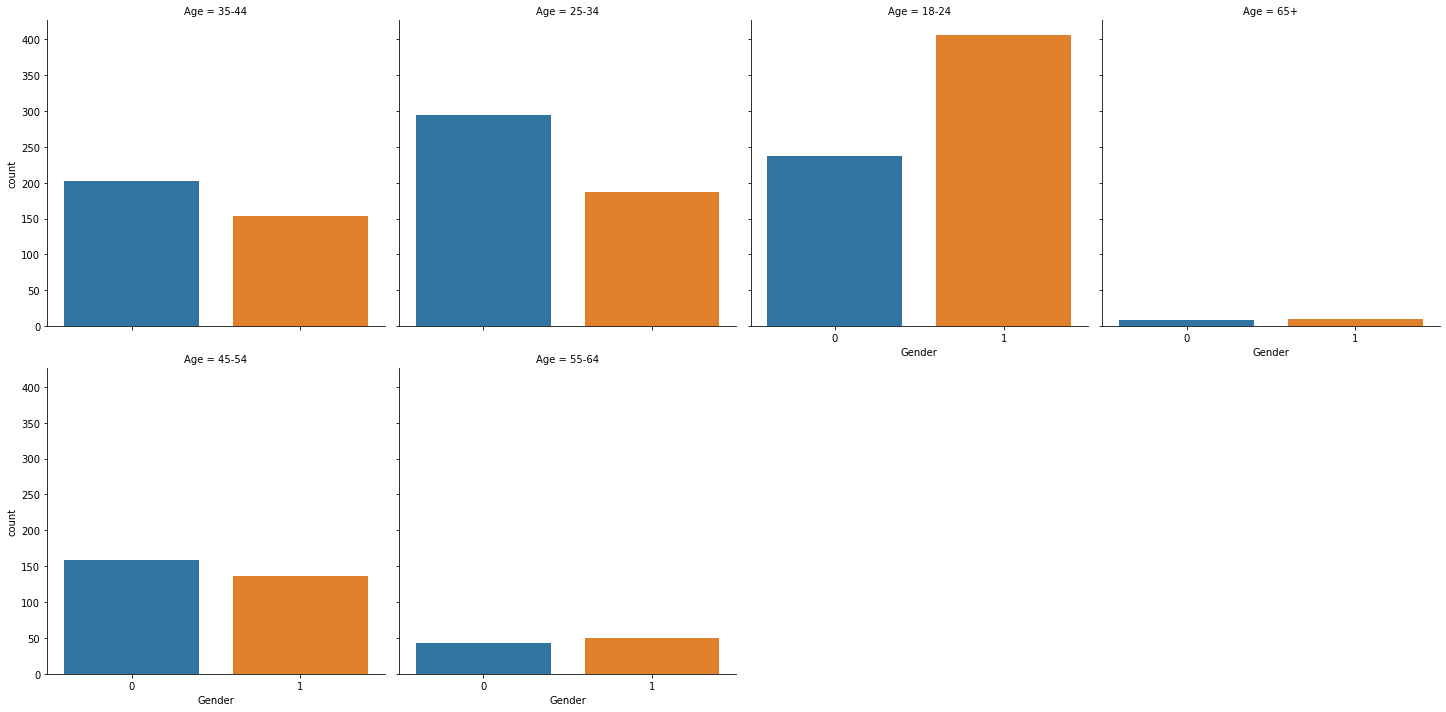

In [432]:
sns.factorplot("Gender", col='Age', data=df, kind="count", col_wrap=4);

In [433]:
#fig = px.histogram(df, x="Age", color='Gender')
#fig.show()

### Delete rows with Semer

In [434]:
df.query('Semer == 0', inplace = True)

### Create bins 

In [435]:
drugs = df.columns[13:]
drugs_bin = [drug + '_bin' for drug in drugs]
def users(u):
    if u == 0 or u == 1:
        return 0
    else:
        return 1
    

In [436]:
for i in range(len(drugs)):
    df[drugs_bin[i]] = df[drugs[i]].apply(users)

<AxesSubplot:xlabel='Age', ylabel='Alcohol'>

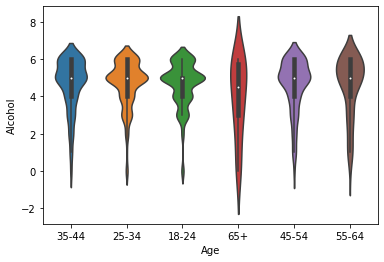

In [437]:
sns.violinplot(x='Age',y='Alcohol',data=df)

In [439]:
df.describe()

,ID,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,Semer_bin,VSA_bin
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.0,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.00000,1877.000000,1877.0,1877.000000
mean,943.079915,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.0,0.429409,0.964305,0.359084,0.196058,0.405967,0.980288,0.669686,0.981886,0.362813,0.100160,0.396910,0.111348,0.184337,0.402770,0.293554,0.220565,0.36601,0.669153,0.0,0.120405
std,544.601919,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.0,0.959160,0.185579,0.479860,0.397118,0.491209,0.139047,0.470452,0.133399,0.480940,0.300293,0.489387,0.314646,0.387862,0.490586,0.455511,0.414738,0.48184,0.470644,0.0,0.325521
min,1.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
25%,472.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
50%,944.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.0,0.000000
75%,1413.000000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.0,0.000000
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.0,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,1.000000


In [440]:
df.drop('ID', axis=1, inplace=True)

In [441]:
df.drop('Semer', axis=1, inplace=True)
df.drop('Semer_bin', axis=1, inplace=True)

In [442]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin
0,35-44,0,diploma,uk,white-asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,25-34,1,doctorate_degree,uk,white,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
2,35-44,1,diploma,uk,white,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,18-24,0,masters_degree,uk,white,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
4,35-44,0,doctorate_degree,uk,white,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0


### Dummies

In [443]:
df['Ethnicity'].value_counts()

white          1715
other            62
black            33
asian            25
white-asian      20
white-black      19
black-asian       3
Name: Ethnicity, dtype: int64

In [444]:
df = df.merge(pd.get_dummies(df.Age, drop_first=True, prefix='age'), left_index=True, right_index=True)
#df.drop('Age', 1, inplace=True)
df = df.merge(pd.get_dummies(df.Education, drop_first=True, prefix='educ'), left_index=True, right_index=True)
#df.drop('Education', 1, inplace=True)
df = df.merge(pd.get_dummies(df.Country, drop_first=True, prefix='country'), left_index=True, right_index=True)
#df.drop('Country', 1, inplace=True)
df = df.merge(pd.get_dummies(df.Ethnicity, drop_first=True, prefix='eth'), left_index=True, right_index=True)
#df.drop('Ethnicity', 1, inplace=True)

In [445]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,educ_at_17,educ_at_18,educ_before_16,educ_diploma,educ_doctorate_degree,educ_masters_degree,educ_some_college,educ_university_degree,country_canada,country_new_zealand,country_other,country_republic_of_ireland,country_uk,country_usa,eth_black,eth_black-asian,eth_other,eth_white,eth_white-asian,eth_white-black
0,35-44,0,diploma,uk,white-asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,25-34,1,doctorate_degree,uk,white,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,35-44,1,diploma,uk,white,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,18-24,0,masters_degree,uk,white,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,35-44,0,doctorate_degree,uk,white,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### Split for EDA

In [448]:
from sklearn.model_selection import train_test_split

In [449]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [450]:
data_train = df.iloc[:, :48].to_csv('../../data/processed/data_train_eda.csv', index=False)
data_test = df.iloc[:, :48].to_csv('../../data/processed/data_test_eda.csv', index=False)

,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin
0,67,1203,1509,1115,37,620,34,1196,1689,1132,1668,1531,1121,1326,1463,1190,621,1651
1,1810,674,368,762,1840,1257,1843,681,188,745,209,346,756,551,414,687,1256,226


### Define X and y

In [ ]:
features = df_train.columns.tolist()[:8] + df_train.columns.tolist()[44:]
X = df_train[features]

In [ ]:
y_all = df_train[df.columns.tolist()[26:44]]

In [ ]:
y_all.apply(pd.value_counts)

## EDA

### Decision Tree

In [379]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)

In [401]:
from sklearn.preprocessing import MinMaxScaler

In [403]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Cross Validation

In [404]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [405]:
best_scores = {}
for y in y_all:
    X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=1, stratify=df[y])
    scoring = ['precision', 'recall', 'accuracy', 'f1']
    scores = cross_validate(dtree, X_train, y_train, cv=5, scoring=scoring, return_train_score = True)
    best_scores[y]=np.mean(scores['test_recall']).round(2)

In [406]:
best_scores

{'Alcohol_bin': 0.99,
 'Amphet_bin': 0.59,
 'Amyl_bin': 0.06,
 'Benzos_bin': 0.58,
 'Caff_bin': 0.99,
 'Cannabis_bin': 0.8,
 'Choc_bin': 0.99,
 'Coke_bin': 0.5,
 'Crack_bin': 0.07,
 'Ecstasy_bin': 0.64,
 'Heroin_bin': 0.13,
 'Ketamine_bin': 0.12,
 'Legalh_bin': 0.64,
 'LSD_bin': 0.61,
 'Meth_bin': 0.39,
 'Shrooms_bin': 0.7,
 'Nicotine_bin': 0.82,
 'VSA_bin': 0.1}

### Random Forest

In [407]:
from sklearn.ensemble import RandomForestClassifier

In [411]:
rnc = RandomForestClassifier(n_estimators = 200, random_state=10, class_weight="balanced")

In [412]:
best_scores = {}
for y in y_all:
    X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=1, stratify=df[y])
    scoring = ['precision', 'recall', 'accuracy', 'f1']
    scores = cross_validate(rnc, X_train, y_train, cv=5, scoring=scoring, return_train_score = True)
    best_scores[y]=np.mean(scores['test_recall']).round(2)

/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicte

In [413]:
best_scores

{'Alcohol_bin': 1.0,
 'Amphet_bin': 0.51,
 'Amyl_bin': 0.09,
 'Benzos_bin': 0.55,
 'Caff_bin': 1.0,
 'Cannabis_bin': 0.87,
 'Choc_bin': 1.0,
 'Coke_bin': 0.45,
 'Crack_bin': 0.0,
 'Ecstasy_bin': 0.64,
 'Heroin_bin': 0.08,
 'Ketamine_bin': 0.05,
 'Legalh_bin': 0.7,
 'LSD_bin': 0.55,
 'Meth_bin': 0.34,
 'Shrooms_bin': 0.64,
 'Nicotine_bin': 0.88,
 'VSA_bin': 0.04}